In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:/credit suisse")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import lfilter

In [4]:
df1=pd.read_csv('KOTAKBANK.NS.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-04,323.049988,325.500000,315.000000,316.350006,314.311554,1079954.0
1,2013-04-05,318.000000,320.325012,314.600006,318.375000,316.323456,1147292.0
2,2013-04-08,315.350006,320.000000,311.600006,315.049988,313.019928,2722834.0
3,2013-04-09,316.500000,321.825012,307.500000,309.375000,307.381470,1013592.0
4,2013-04-10,309.950012,319.950012,309.024994,319.100006,317.043854,743366.0
5,2013-04-11,320.000000,320.450012,310.000000,315.274994,313.243469,1284004.0
6,2013-04-12,315.000000,320.924988,315.000000,319.174988,317.118317,567556.0
7,2013-04-15,319.174988,324.500000,316.625000,320.350006,318.285797,600704.0
8,2013-04-16,319.350006,329.024994,318.325012,326.600006,324.495483,739434.0
9,2013-04-17,328.024994,332.725006,323.600006,329.875000,327.749390,1634562.0


In [5]:
df1.shape

(1232, 7)

In [6]:
df1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [7]:
df1['Date']=pd.to_datetime(df1['Date'])

In [8]:
df1.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [9]:
df1.fillna(df1.mean(),inplace=True)

In [10]:
close_zero=df1.iloc[-1].Close

In [11]:
df1['HL_PCT'] = (df1['High'] - df1['Low'])/(df1['Low']*100)

In [12]:
df1['PCT_CHNG_OpCl'] = (df1['Close'] - df1['Open'])/(df1['Open']*100)

In [13]:
df1['PCT_CHNG_CLOSE'] = (df1['Close'] - df1['Adj Close'])/(df1['Adj Close']*100)

In [14]:
df1.index=df1['Date']

In [15]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE
Date,,,,,,,,,,
2013-04-04,2013-04-04,323.049988,325.500000,315.000000,316.350006,314.311554,1079954.0,0.000333,-0.000207,0.000065
2013-04-05,2013-04-05,318.000000,320.325012,314.600006,318.375000,316.323456,1147292.0,0.000182,0.000012,0.000065
2013-04-08,2013-04-08,315.350006,320.000000,311.600006,315.049988,313.019928,2722834.0,0.000270,-0.000010,0.000065
2013-04-09,2013-04-09,316.500000,321.825012,307.500000,309.375000,307.381470,1013592.0,0.000466,-0.000225,0.000065
2013-04-10,2013-04-10,309.950012,319.950012,309.024994,319.100006,317.043854,743366.0,0.000354,0.000295,0.000065


In [16]:
df=df1[['Open','High','Low','Adj Close','Volume','HL_PCT','PCT_CHNG_OpCl','PCT_CHNG_CLOSE','Close']]

## Prediction for 30th Day

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import datetime

C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


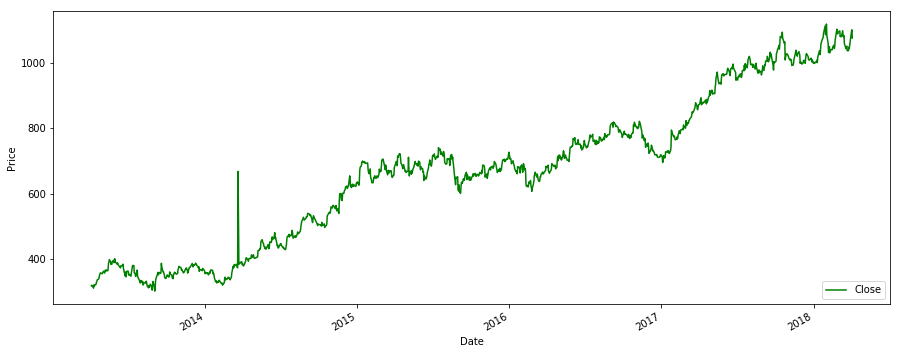

In [18]:
df['Close'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [19]:
df.tail()

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close
Date,,,,,,,,,
2018-03-27,1043.000000,1058.000000,1043.000000,1049.849976,2148618.0,0.000144,0.000066,0.0,1049.849976
2018-03-28,1044.050049,1057.000000,1040.599976,1047.800049,5927388.0,0.000158,0.000036,0.0,1047.800049
2018-04-02,1047.800049,1100.449951,1047.800049,1096.550049,2666027.0,0.000502,0.000465,0.0,1096.550049
2018-04-03,1094.500000,1105.099976,1087.500000,1103.300049,1345130.0,0.000162,0.000080,0.0,1103.300049
2018-04-04,1108.900024,1111.800049,1075.000000,1078.300049,1305078.0,0.000342,-0.000276,0.0,1078.300049


In [20]:
forecast_col = 'Close'

forecast_out = int(42)
# We will drop 12 columns because there are 12 holidays

In [21]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head(2))

                  Open        High         Low   Adj Close     Volume  \
Date                                                                    
2013-04-04  323.049988  325.500000  315.000000  314.311554  1079954.0   
2013-04-05  318.000000  320.325012  314.600006  316.323456  1147292.0   

              HL_PCT  PCT_CHNG_OpCl  PCT_CHNG_CLOSE       Close       label  
Date                                                                         
2013-04-04  0.000333      -0.000207        0.000065  316.350006  387.350006  
2013-04-05  0.000182       0.000012        0.000065  318.375000  381.450012  


In [22]:
X = np.array(df.drop(['label'], 1))

In [23]:
X = preprocessing.scale(X)

In [24]:
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]

In [25]:
y = np.array(df['label'])
y = y[:-forecast_out]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print("Accuracy of our prediction model",clf.score(X_test, y_test)*100,"%")

Accuracy of our prediction model 94.61050811593695 %


In [29]:
# Taking first 30 values since 12 days are holidays

forecast_prediction = clf.predict(X_forecast_out)
print(forecast_prediction[:30])

[1094.38854521 1110.92559582 1081.68092489 1065.16266408 1035.48149767
 1049.98005243 1053.69551928 1051.28536497 1063.86081482 1060.08169035
 1064.65766079 1055.5981929  1082.31738188 1053.81606742 1068.48791873
 1069.25770207 1100.02504639 1092.00758558 1109.75800303 1111.39420935
 1102.07472555 1106.45646447 1085.19706196 1086.52818311 1095.98970417
 1098.21547264 1101.80768032 1081.90856413 1099.47099919 1103.2592799 ]


In [30]:
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [31]:
df

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04 00:00:00,323.049988,325.500000,315.000000,314.311554,1079954.0,0.000333,-0.000207,0.000065,316.350006,387.350006,NaN
2013-04-05 00:00:00,318.000000,320.325012,314.600006,316.323456,1147292.0,0.000182,0.000012,0.000065,318.375000,381.450012,NaN
2013-04-08 00:00:00,315.350006,320.000000,311.600006,313.019928,2722834.0,0.000270,-0.000010,0.000065,315.049988,376.825012,NaN
2013-04-09 00:00:00,316.500000,321.825012,307.500000,307.381470,1013592.0,0.000466,-0.000225,0.000065,309.375000,374.700012,NaN
2013-04-10 00:00:00,309.950012,319.950012,309.024994,317.043854,743366.0,0.000354,0.000295,0.000065,319.100006,373.174988,NaN
2013-04-11 00:00:00,320.000000,320.450012,310.000000,313.243469,1284004.0,0.000337,-0.000148,0.000065,315.274994,371.700012,NaN
2013-04-12 00:00:00,315.000000,320.924988,315.000000,317.118317,567556.0,0.000188,0.000133,0.000065,319.174988,378.350006,NaN
2013-04-15 00:00:00,319.174988,324.500000,316.625000,318.285797,600704.0,0.000249,0.000037,0.000065,320.350006,378.075012,NaN
2013-04-16 00:00:00,319.350006,329.024994,318.325012,324.495483,739434.0,0.000336,0.000227,0.000065,326.600006,381.399994,NaN


In [32]:
pred=df[-42:]

In [33]:
df=df[:-42]

In [34]:
pred

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-04-05 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094.388545
2018-04-06 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110.925596
2018-04-07 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1081.680925
2018-04-08 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1065.162664
2018-04-09 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1035.481498
2018-04-10 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049.980052
2018-04-11 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1053.695519
2018-04-12 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1051.285365
2018-04-13 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1063.860815


In [35]:
pred=pred.reset_index()

In [36]:
pred['Date']=pred['Date'].dt.date

In [37]:
pred.head(1)

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094.388545


In [38]:
holidays=['2018-04-07','2018-04-08','2018-04-14','2018-04-15','2018-04-21','2018-04-22','2018-04-28','2018-04-29','2018-05-01','2018-05-05','2018-05-06','2018-05-12','2018-05-13']

In [39]:
pred['Date']=pred['Date'].apply(str)

In [40]:
for i in holidays:
    pred = pred.drop(pred[pred.Date==i].index)

In [41]:
pred['Date']=pd.to_datetime(pred['Date'])

In [42]:
pred.drop('forecast',axis=1,inplace=True)

In [43]:
pred.shape

(29, 11)

In [44]:
pred['forecast']=forecast_prediction[:29]

In [45]:
pred

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094.388545
1,2018-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110.925596
4,2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1081.680925
5,2018-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1065.162664
6,2018-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1035.481498
7,2018-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049.980052
8,2018-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1053.695519
11,2018-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1051.285365
12,2018-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1063.860815
13,2018-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.081690


In [46]:
pred.index=pred['Date']
pred.drop('Date',axis=1,inplace=True)

In [47]:
df=df.append(pred)

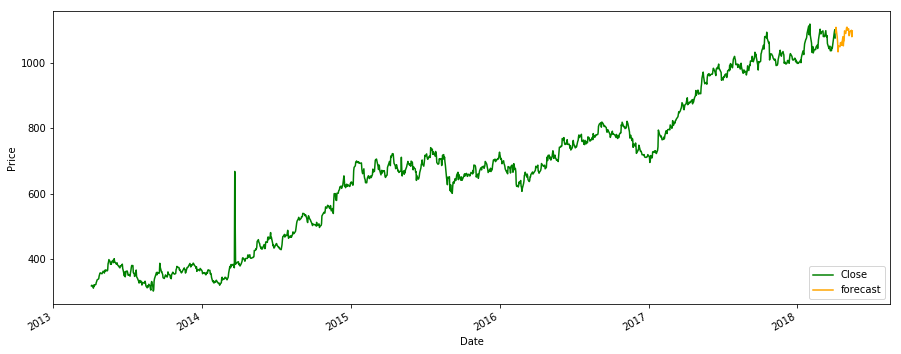

In [48]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

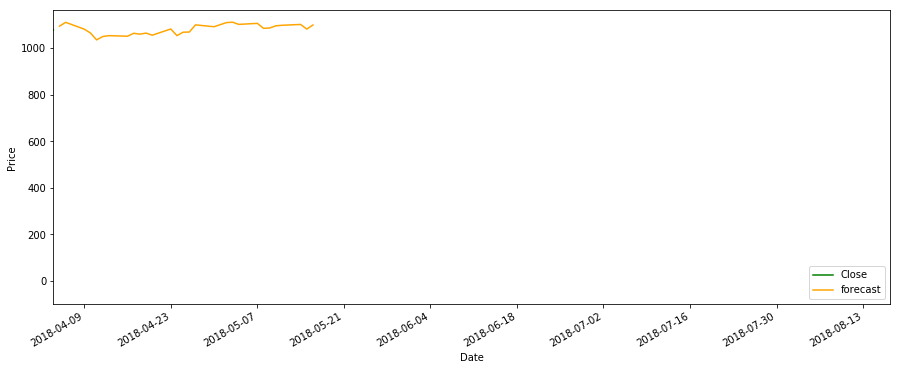

In [49]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2018, 4, 4))
plt.ylim(ymin=-100)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [50]:
df.iloc[-1]

Open                      NaN
High                      NaN
Low                       NaN
Adj Close                 NaN
Volume                    NaN
HL_PCT                    NaN
PCT_CHNG_OpCl             NaN
PCT_CHNG_CLOSE            NaN
Close                     NaN
label                     NaN
forecast          1099.470999
Name: 2018-05-16 00:00:00, dtype: float64

In [51]:
close_last=df.iloc[-1].forecast

In [52]:
pred_return=close_last-close_zero
print("Predicted Return: Rs.",pred_return)

Predicted Return: Rs. 21.170950194981742


## Simple Moving Average (30,40,50)

In [53]:
# For 30 days
short_rolling = df.rolling(window=30).mean()
short_rolling.head(30)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# For 40 days
med_rolling = df.rolling(window=40).mean()
med_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# For 50 days
long_rolling = df.rolling(window=50).mean()
long_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Price in Rs.')

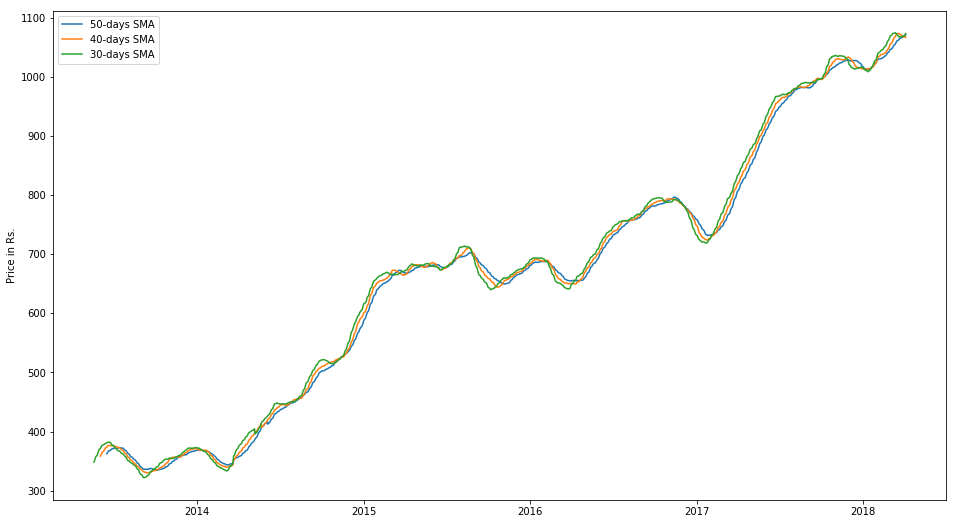

In [56]:
start_date = '2013-04-29'
end_date = '2018-04-04'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '50-days SMA')
ax.plot(med_rolling.loc[start_date:end_date, :].index, med_rolling.loc[start_date:end_date, 'Close'], label = '40-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '30-days SMA')


ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')


## Exponential Moving Average (30,40,50)

Text(0,0.5,'Price in Rs.')

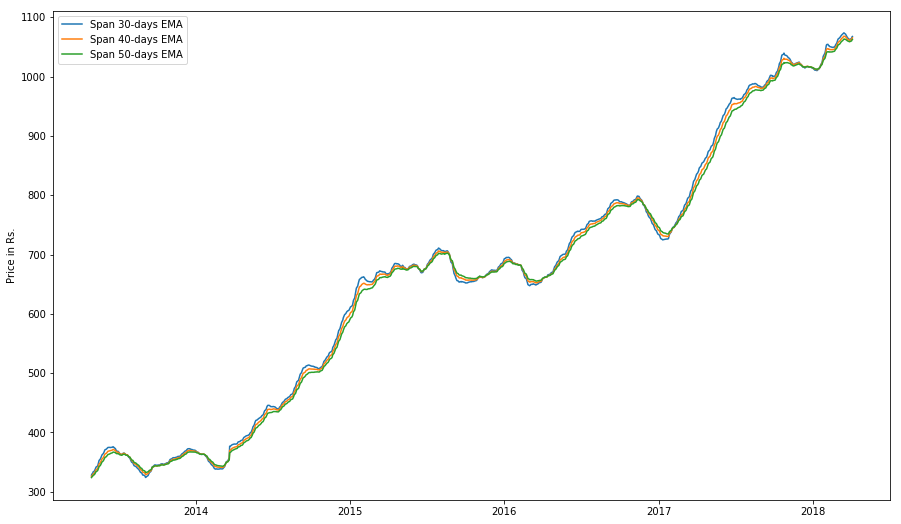

In [57]:
ema_short = df.ewm(span=30, adjust=False).mean()
ema_med = df.ewm(span=40, adjust=False).mean()
ema_long = df.ewm(span=50, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 30-days EMA')
ax.plot(ema_med.loc[start_date:end_date, :].index, ema_med.loc[start_date:end_date, 'Close'], label = 'Span 40-days EMA')
ax.plot(ema_long.loc[start_date:end_date, :].index, ema_long.loc[start_date:end_date, 'Close'], label = 'Span 50-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')

## Aroon Oscillator (30,40,50)

In [58]:
from pandas.stats import moments
from pandas import DataFrame

In [59]:
def aroon(s, n):
    up = 100 * moments.rolling_apply(s.High, n + 1, lambda x: x.argmax()) / n
    dn = 100 * moments.rolling_apply(s.Low, n + 1, lambda x: x.argmin()) / n

    return DataFrame(dict(up=up, down=dn))

In [60]:
ao30=aroon(df,30)
ao40=aroon(df,40)
ao50=aroon(df,50)

In [61]:
ao30

,down,up
Date,,
2013-04-04,NaN,NaN
2013-04-05,NaN,NaN
2013-04-08,NaN,NaN
2013-04-09,NaN,NaN
2013-04-10,NaN,NaN
2013-04-11,NaN,NaN
2013-04-12,NaN,NaN
2013-04-15,NaN,NaN
2013-04-16,NaN,NaN


Text(0,0.5,'Change in Price in Rs.')

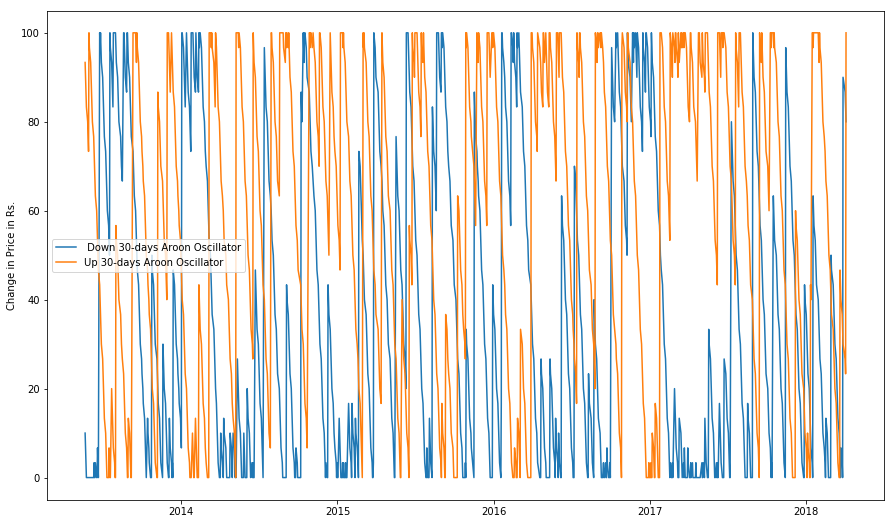

In [62]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 30-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 30-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

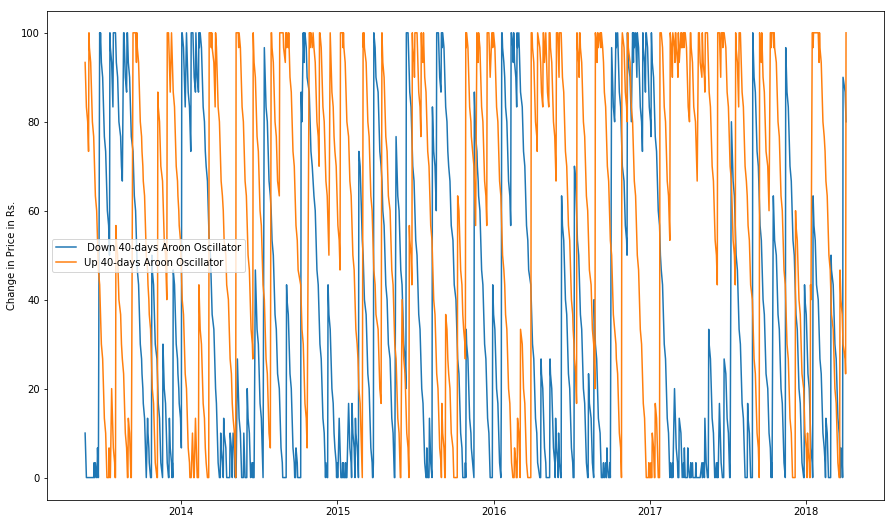

In [63]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 40-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 40-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

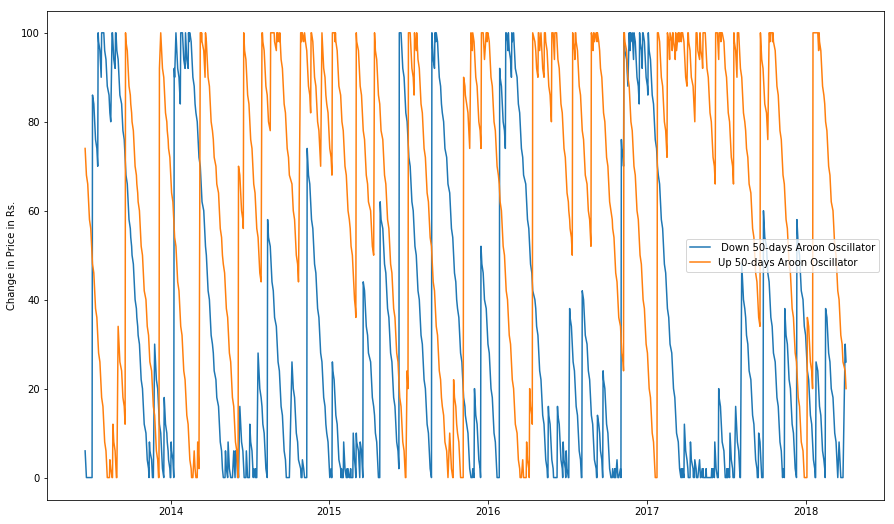

In [64]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'down'], label = ' Down 50-days Aroon Oscillator')
ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'up'], label = 'Up 50-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

## MACD Signal

In [65]:
def ema(s, n, wilder=False):
    span = n if not wilder else 2*n - 1
    return moments.ewma(s, span=span)


def macd(s, nfast=12, nslow=26, nsig=9, percent=True):
    fast, slow = ema(s, nfast), ema(s, nslow)

    if percent:
        macd = 100*(fast / slow - 1)
    else:
        macd = fast - slow

    sig = ema(macd, nsig)
    hist = macd - sig

    return DataFrame(dict(macd=macd, signal=sig, hist=hist,
                          fast=fast, slow=slow))

In [66]:
m=macd(df['Close'])

In [67]:
m.head(1)

,fast,hist,macd,signal,slow
Date,,,,,
2013-04-04,316.350006,0.0,0.0,0.0,316.350006


Text(0,0.5,'Change ')

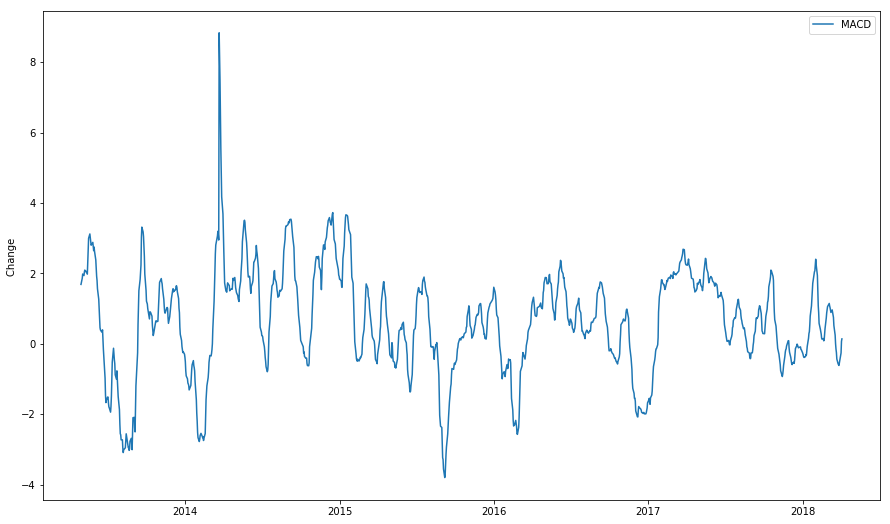

In [68]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(m.loc[start_date:end_date, :].index, m.loc[start_date:end_date, 'macd'], label = 'MACD')

ax.legend(loc='best')
ax.set_ylabel('Change ')

## Relative Strength Index (RSI)

In [69]:
def rsi(s, n=14):
    diff = s.diff()
    which_dn = diff < 0

    up, dn = diff, diff*0
    up[which_dn], dn[which_dn] = 0, -up[which_dn]

    emaup = ema(up, n, wilder=True)
    emadn = ema(dn, n, wilder=True)

    return 100 * emaup/(emaup + emadn)

In [70]:
sf=rsi(df['Close'],50)

In [71]:
sfd=pd.DataFrame({'Date':sf.index, 'RSI':sf.values})

In [72]:
sfd.index=sfd['Date']

Text(0,0.5,'Change')

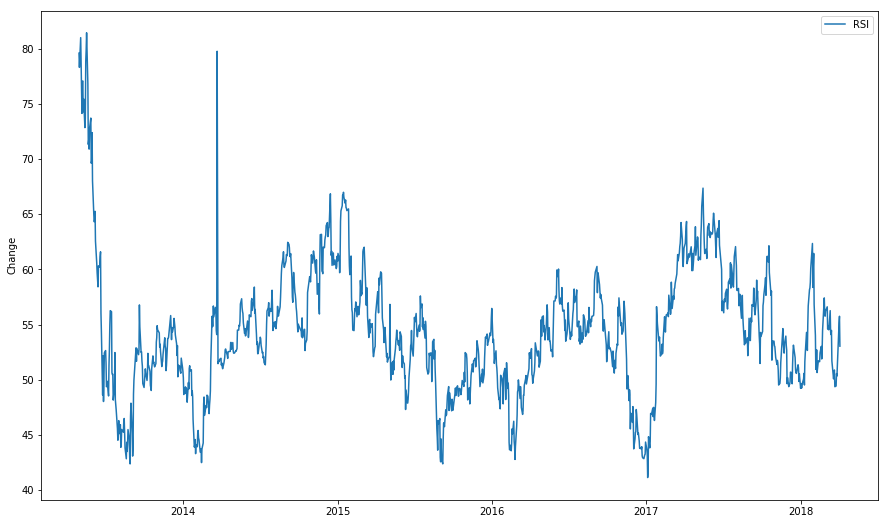

In [73]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(sfd.loc[start_date:end_date, :].index, sfd.loc[start_date:end_date, 'RSI'], label = 'RSI')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Bollinger Bands (30,40,50)

In [74]:
price=df["Close"]

def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    sd = pd.stats.moments.rolling_std(price,length)
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

df['ave30'], df['upper30'], df['lower30'] = bbands(df.Close, length=30, numsd=1)
df['ave40'], df['upper40'], df['lower40'] = bbands(df.Close, length=40, numsd=1)
df['ave50'], df['upper50'], df['lower50'] = bbands(df.Close, length=50, numsd=1)

Text(0,0.5,'Change')

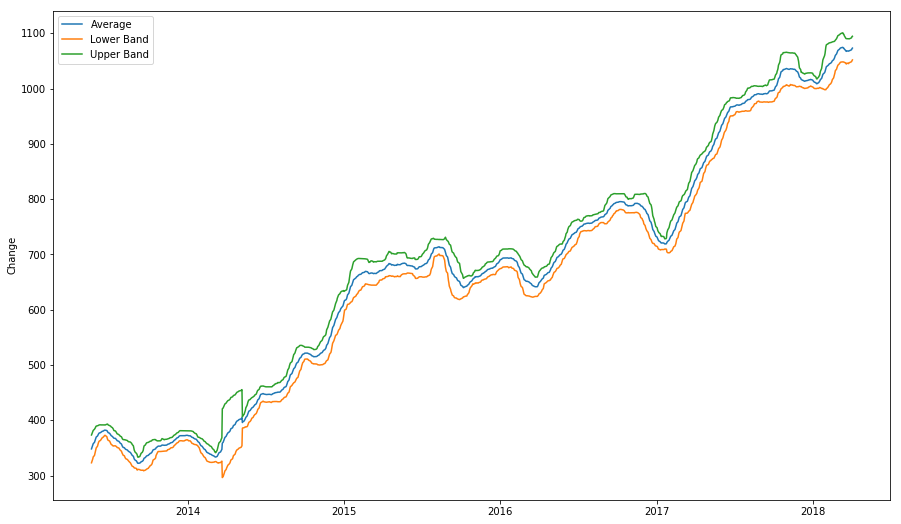

In [75]:
# For 30 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave30'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower30'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper30'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

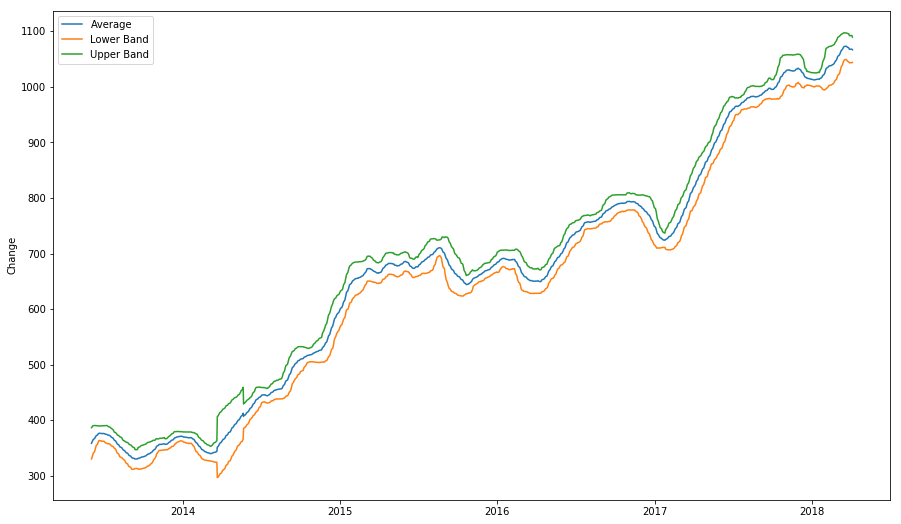

In [76]:
# For 40 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave40'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower40'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper40'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

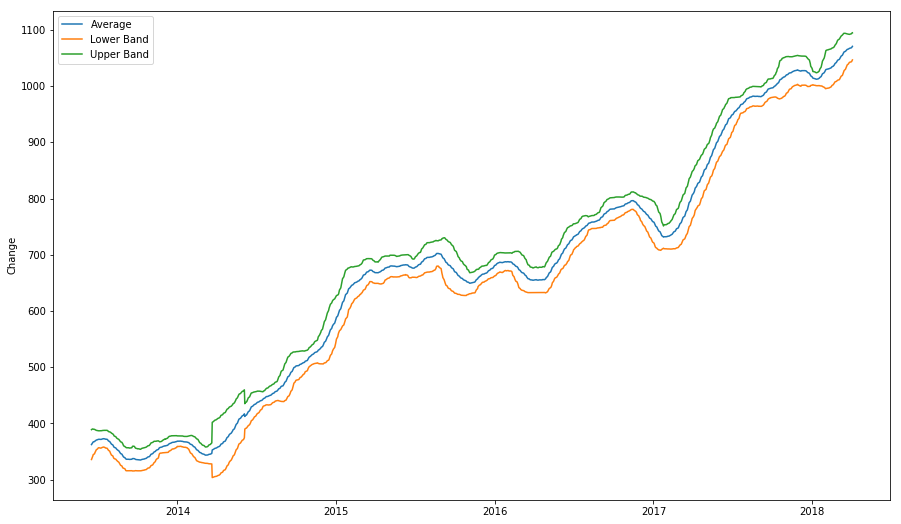

In [77]:
# For 50 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave50'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower50'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper50'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Stochastic Oscillator

In [78]:
def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

In [79]:
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)

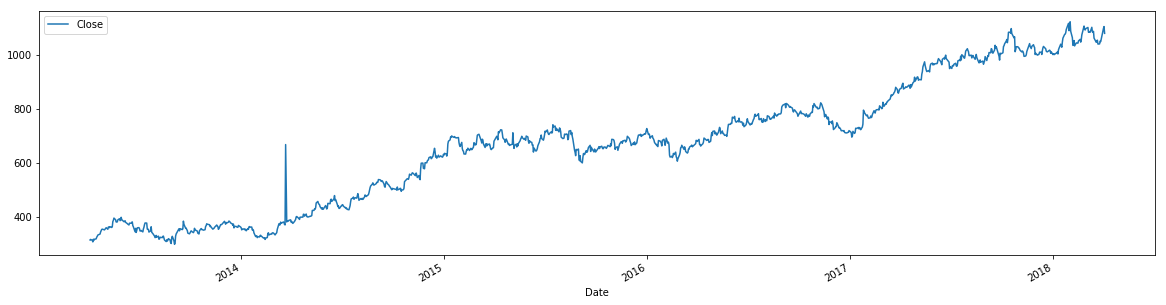

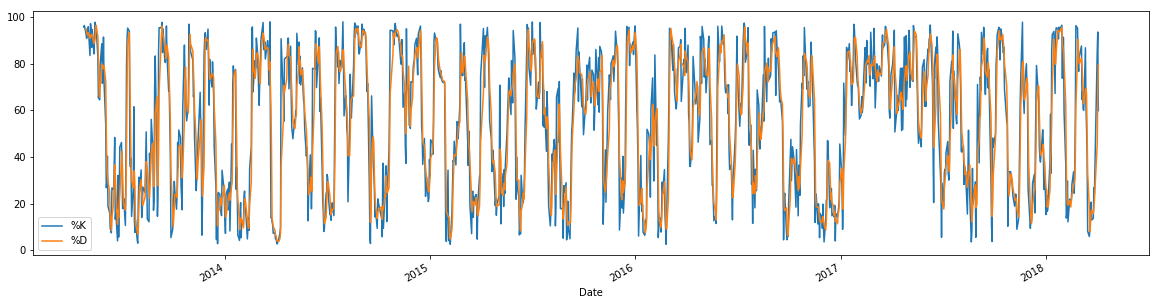

In [80]:
df.plot(y=['Close'], figsize = (20, 5))
df.plot(y=['%K', '%D'], figsize = (20, 5))

## Chande Oscillator

In [81]:
def avg_true_range(df): 
  ind = range(0,len(df))
  indexlist = list(ind)
  df.index = indexlist

  for index, row in df.iterrows():
    if index != 0:
      tr1 = row["High"] - row["Low"]
      tr2 = abs(row["High"] - df.iloc[index-1]["Close"])
      tr3 = abs(row["Low"] - df.iloc[index-1]["Close"])

      true_range = max(tr1, tr2, tr3)
      df.set_value(index,"True Range", true_range)

  df["Avg TR"] = df["True Range"].rolling(min_periods=14, window=14, center=False).mean()
  return df

In [82]:
def chandelier_exit(df):

  df_tr = avg_true_range(df)

  df_tr['rolling_high']= df_tr["High"]
  df_tr['rolling_low'] = df_tr["Low"]

  df_tr['chandelier_long'] = df_tr['rolling_high'] - df_tr["Avg TR"] * 3
  df_tr['chandelier_short'] = df_tr['rolling_low'] - df_tr["Avg TR"] * 3
  fig, ax = plt.subplots(figsize=(15,9))

  ax.plot(df_tr['Date'], df_tr['chandelier_long'], label = 'Chand Long')

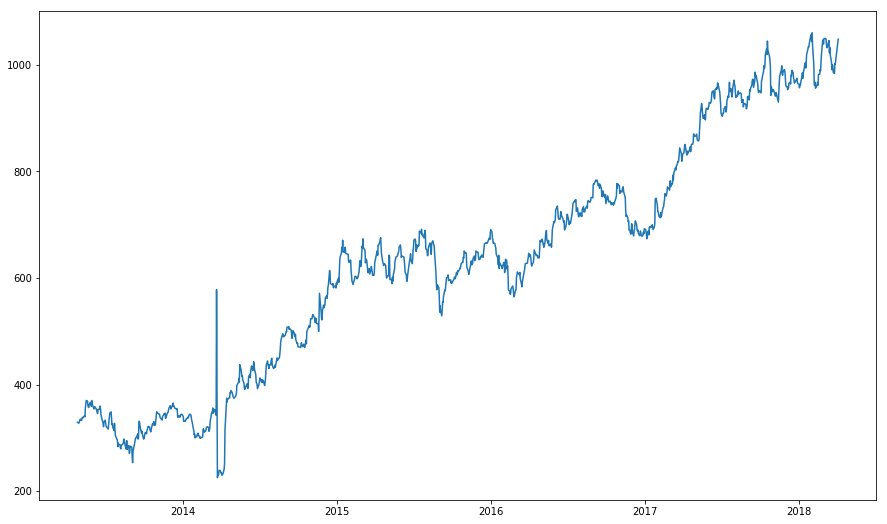

In [83]:
ch=chandelier_exit(df1)

## Commodity Channel Index (30,40,50)

In [84]:
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI')
 data=data.join(CCI)
 return data

In [85]:
cci30=CCI(df,30)
cci40=CCI(df,40)
cci50=CCI(df,50)

In [86]:
cci30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,lower30,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,CCI
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,323.049988,325.500000,315.000000,314.311554,1079954.0,0.000333,-0.000207,0.000065,316.350006,387.350006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,318.000000,320.325012,314.600006,316.323456,1147292.0,0.000182,0.000012,0.000065,318.375000,381.450012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-08,315.350006,320.000000,311.600006,313.019928,2722834.0,0.000270,-0.000010,0.000065,315.049988,376.825012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-09,316.500000,321.825012,307.500000,307.381470,1013592.0,0.000466,-0.000225,0.000065,309.375000,374.700012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-10,309.950012,319.950012,309.024994,317.043854,743366.0,0.000354,0.000295,0.000065,319.100006,373.174988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-11,320.000000,320.450012,310.000000,313.243469,1284004.0,0.000337,-0.000148,0.000065,315.274994,371.700012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12,315.000000,320.924988,315.000000,317.118317,567556.0,0.000188,0.000133,0.000065,319.174988,378.350006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,319.174988,324.500000,316.625000,318.285797,600704.0,0.000249,0.000037,0.000065,320.350006,378.075012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16,319.350006,329.024994,318.325012,324.495483,739434.0,0.000336,0.000227,0.000065,326.600006,381.399994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Change')

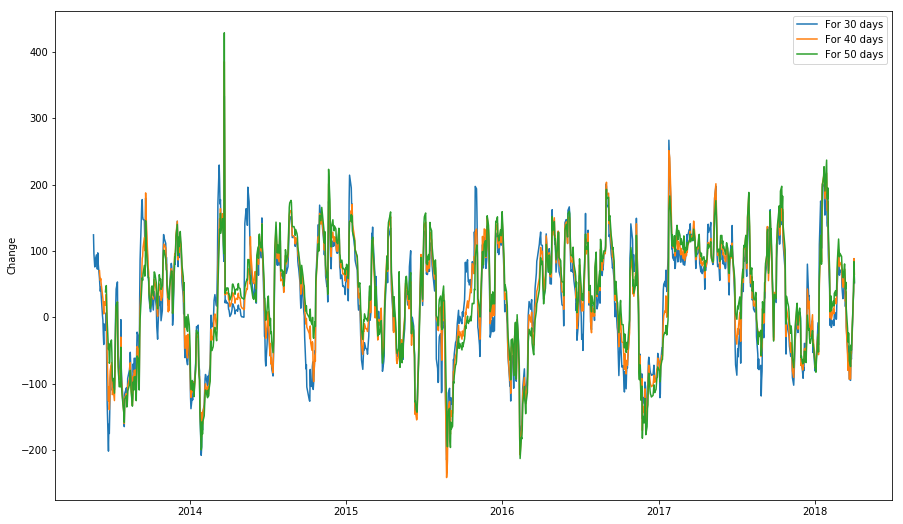

In [87]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(cci30.loc[start_date:end_date, :].index, cci30.loc[start_date:end_date, 'CCI'], label = 'For 30 days')
ax.plot(cci40.loc[start_date:end_date, :].index, cci40.loc[start_date:end_date, 'CCI'], label = 'For 40 days')
ax.plot(cci50.loc[start_date:end_date, :].index, cci50.loc[start_date:end_date, 'CCI'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Chakin Volatility Indicator (30,40,50)

In [88]:
def chaikin_oscillator(data, periods_short=3, periods_long=30, high_col='High',
                       low_col='Low', close_col='Close', vol_col='Volume'):
    ac = pd.Series([])

    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            val = ((row[close_col] - row[low_col]) - (row[high_col] - row[close_col])) / (row[high_col] - row[low_col]) * row[vol_col]
        else:
            val = 0
        ac.set_value(index, val)

    ema_long = ac.ewm(ignore_na=False, min_periods=0, com=periods_long, adjust=True).mean()
    ema_short = ac.ewm(ignore_na=False, min_periods=0, com=periods_short, adjust=True).mean()
    data['ch_osc'] = ema_short - ema_long

    return data

In [89]:
ch30=chaikin_oscillator(df,3,30)
ch40=chaikin_oscillator(df,3,40)
ch50=chaikin_oscillator(df,3,50)

Text(0,0.5,'Change')

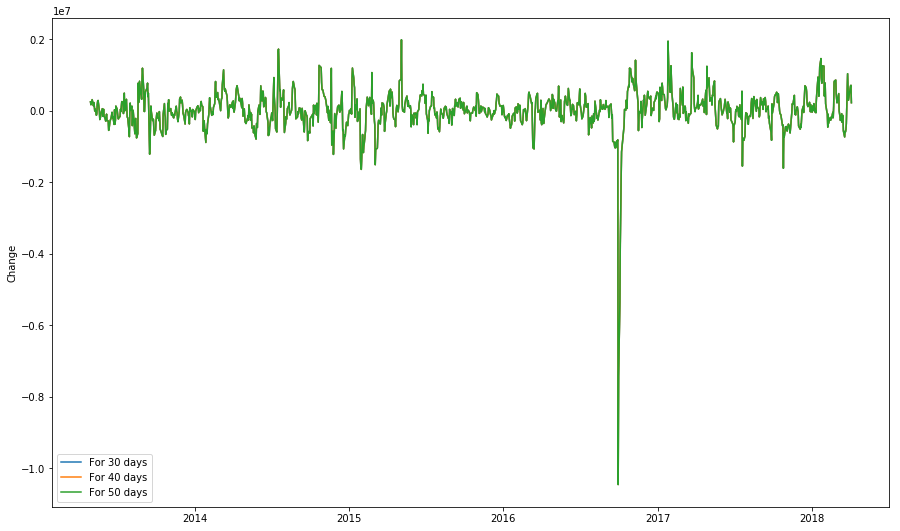

In [90]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ch30.loc[start_date:end_date, :].index, ch30.loc[start_date:end_date, 'ch_osc'], label = 'For 30 days')
ax.plot(ch40.loc[start_date:end_date, :].index, ch40.loc[start_date:end_date, 'ch_osc'], label = 'For 40 days')
ax.plot(ch50.loc[start_date:end_date, :].index, ch50.loc[start_date:end_date, 'ch_osc'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

#overlapped each other

## Rate of Price Change (30,40,50)

In [91]:
def ROC(data,n):
 N = data['Close'].diff(n)
 D = data['Close'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [92]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [93]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,323.049988,325.500000,315.000000,314.311554,1079954.0,0.000333,-0.000207,0.000065,316.350006,387.350006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-04-05,318.000000,320.325012,314.600006,316.323456,1147292.0,0.000182,0.000012,0.000065,318.375000,381.450012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77644.861269,NaN
2013-04-08,315.350006,320.000000,311.600006,313.019928,2722834.0,0.000270,-0.000010,0.000065,315.049988,376.825012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18753.100350,NaN
2013-04-09,316.500000,321.825012,307.500000,307.381470,1013592.0,0.000466,-0.000225,0.000065,309.375000,374.700012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36024.242146,NaN
2013-04-10,309.950012,319.950012,309.024994,317.043854,743366.0,0.000354,0.000295,0.000065,319.100006,373.174988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101227.032957,NaN
2013-04-11,320.000000,320.450012,310.000000,313.243469,1284004.0,0.000337,-0.000148,0.000065,315.274994,371.700012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98068.178288,NaN
2013-04-12,315.000000,320.924988,315.000000,317.118317,567556.0,0.000188,0.000133,0.000065,319.174988,378.350006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124112.656137,NaN
2013-04-15,319.174988,324.500000,316.625000,318.285797,600704.0,0.000249,0.000037,0.000065,320.350006,378.075012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99965.593174,NaN
2013-04-16,319.350006,329.024994,318.325012,324.495483,739434.0,0.000336,0.000227,0.000065,326.600006,381.399994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147863.822875,NaN


Text(0,0.5,'Change')

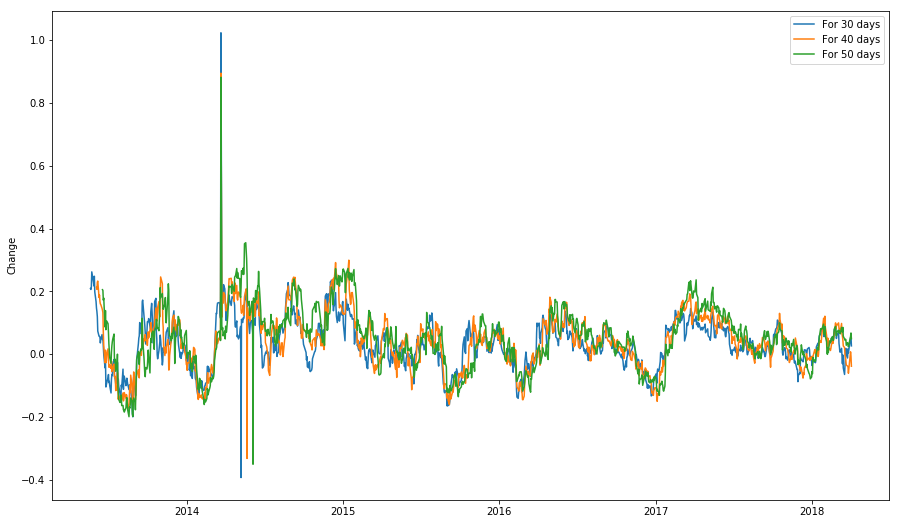

In [94]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Rate of Volume Change (30,40,50)


In [95]:
def ROC(data,n):
 N = data['Volume'].diff(n)
 D = data['Volume'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [96]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [97]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,323.049988,325.500000,315.000000,314.311554,1079954.0,0.000333,-0.000207,0.000065,316.350006,387.350006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-04-05,318.000000,320.325012,314.600006,316.323456,1147292.0,0.000182,0.000012,0.000065,318.375000,381.450012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77644.861269,NaN
2013-04-08,315.350006,320.000000,311.600006,313.019928,2722834.0,0.000270,-0.000010,0.000065,315.049988,376.825012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18753.100350,NaN
2013-04-09,316.500000,321.825012,307.500000,307.381470,1013592.0,0.000466,-0.000225,0.000065,309.375000,374.700012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36024.242146,NaN
2013-04-10,309.950012,319.950012,309.024994,317.043854,743366.0,0.000354,0.000295,0.000065,319.100006,373.174988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101227.032957,NaN
2013-04-11,320.000000,320.450012,310.000000,313.243469,1284004.0,0.000337,-0.000148,0.000065,315.274994,371.700012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98068.178288,NaN
2013-04-12,315.000000,320.924988,315.000000,317.118317,567556.0,0.000188,0.000133,0.000065,319.174988,378.350006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124112.656137,NaN
2013-04-15,319.174988,324.500000,316.625000,318.285797,600704.0,0.000249,0.000037,0.000065,320.350006,378.075012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99965.593174,NaN
2013-04-16,319.350006,329.024994,318.325012,324.495483,739434.0,0.000336,0.000227,0.000065,326.600006,381.399994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147863.822875,NaN


Text(0,0.5,'Change')

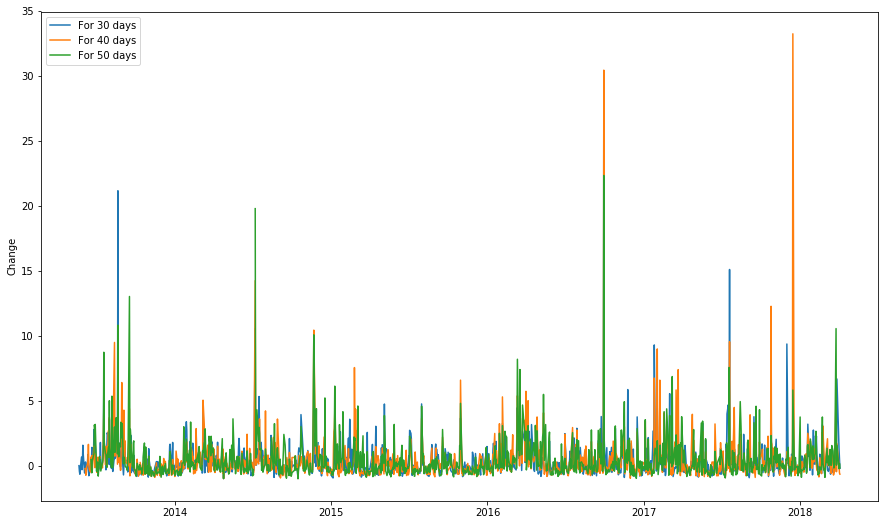

In [98]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')